In [66]:
# load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

from action_prediction import constants as const
from action_prediction.data import DataSet
from action_prediction import visualize as vis

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
const.BEHAVE_DIR

PosixPath('/Users/shannonlee/Documents/action_prediction/data/behavior')

In [68]:
# initialize dataset
data = DataSet(task='social_prediction')

# load behavior
df_behav = data.load_behav()

# load eyetracking
df_eye = data.load_eye(data_type='events')

# merge eyetracking with behav
df_merged = data.merge_behav_eye(dataframe_behav=df_behav, dataframe_eye=df_eye)


##### Questions/relationships to explore

##### General notes
amplitude- size of saccade
dispersion- how large are fixations? if small, subj. fixating in on smaller sphere/ coordinate range around x,y coords
if trend towards fixations getting smaller, could suggest that subj honing in on specific coords more regularly
fixation based on how long subj focusing on specific coord; able to get radius around specific coords
duration- specific to how long fixations last- what might the relationship be between duration of fixation and disperson of fixation? If fixating longer, could mean smaller dispersion (dependent on degree of fixation)
longer duration could correspond with increases in accuracy or decreases in rxn time
block_iter- 1, 2, 3 (for each task type)

How to measure degree of fixations? Large vs. small (dispersion measures the size of the fixations based on coordinates) 
Decreased dispersion = smaller fixation size --> could indicate longer focus on a specific coordinate and increased accuracy in trials

Dispersion based relationships: accuracy higher on easier trials, smaller fixation size --> higher accuracy --> lower dispersion on easy trials, longer duration
With difficult trials, might be more difficult to pinpoint where to focus attention/ gaze?

Specific variables to investigate: label, condition_name, actors
label vs accuracy
label vs. durations
label vs. dispersion- dont particularly intend to see major dispersion differences in label vs. dispersion


Based on the relationship between condition_name (hard vs. easy) and accuracy and the hypothesized relationship between longer durations and smaller dispersion (and potential assoction with increase accuracy, would expect different dispersion levels between hard vs. easy conditions. 

event type- instructions, task, etc
revisit initial thesis questions about learning over time... does your analysis give you enough info to answer the questions? 
How can I go back to the literature and make sense of the results? What was exploratory vs. hypothesis driven? Note that this experiment is generally more exploratory in nature


Relationships between condition_name and 
Two possible hypotheses:
Trends towards longer fixations could suggest that 

In [48]:
df_merged.columns

Index(['peak_velocity', 'amplitude', 'dispersion', 'start_gx', 'start_gy',
       'end_gx', 'end_gy', 'surface', 'end_time', 'type', 'duration',
       'mean_gx', 'mean_gy', 'block_iter', 'exp_event', 'task', 'event_type',
       'run_num', 'subtract', 'onset_sec', 'subj', 'sess', 'start_time',
       'dataset', 'balance_exp', 'stim', 'condition_name',
       'display_trial_feedback', 'replace_stimuli', 'feedback_type',
       'trial_type', 'hand', 'iti_dur', 'trial_dur', 'corr_key', 'resp_made',
       'corr_resp', 'rt', 'real_start_time', 'run_iter', 'session_type',
       'extracted', 'video_name', 'label', 'context', 'initiator', 'agents',
       'angle', 'interact_start_frames', 'initiator_start_frames', 'actors',
       'video_name_corrected', 'interact_start_frames_corr',
       'interact_start_frames_sec', 'initiator_start_frames_corr',
       'initiator_start_frames_sec', 'media', 'video_start', 'video_end',
       'timestamp_sec', 'block_iter_corr'],
      dtype='object')

In [49]:
df_merged.label.unique()

array(['handShake', 'hug', nan], dtype=object)

In [50]:
df_merged.columns
df_merged.block_iter_corr.unique()


array(['run01_block1', 'run01_block2', 'run01_block3', 'run02_block1',
       'run02_block2', 'run02_block3', 'run03_block1', 'run03_block2',
       'run03_block3', 'run04_block1', 'run04_block2', 'run04_block3',
       'run05_block1', 'run05_block2', 'run05_block3', 'run06_block1',
       'run06_block2', 'run06_block3', 'run07_block1', 'run07_block2',
       'run07_block3', 'run08_block1', 'run08_block2', 'run08_block3',
       'run09_block1', 'run09_block2', 'run09_block3', 'run10_block1',
       'run10_block2', 'run10_block3', 'run11_block1', 'run11_block2',
       'run11_block3', 'run12_block1', 'run12_block2', 'run12_block3',
       'run13_block1', 'run13_block2', 'run13_block3', 'run14_block1',
       'run14_block2', 'run14_block3', nan], dtype=object)

In [51]:
#what are some interesting relationships/ hypotheses that I might be interested in? What would you expect BEFORE you try out a bunch of different things


# initialize plotting style
vis.plotting_style()

#### Next steps
Statistical test to show whether there is a statistically significant difference between condition_names

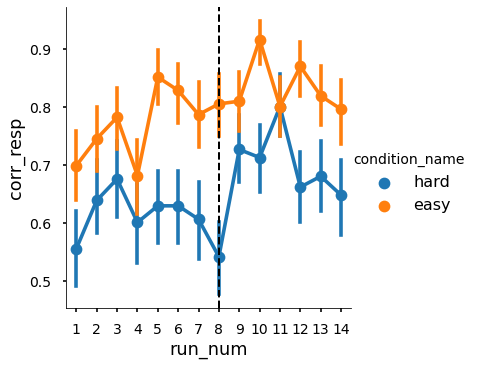

In [52]:
# visualize accuracy across runs
vis.plot_acc(dataframe=df_behav, x='run_num', hue= 'condition_name')
#based on accuracy and condition relationship, may expect to see differences in duration 
#longer duration for easy condition based on accuracy
#smaller dispersion for easy condition
#lower rt for easy
# more fixations for hard condition





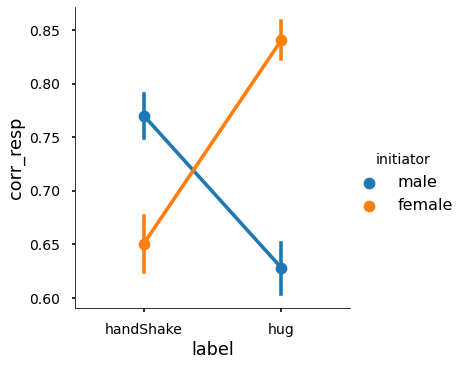

In [117]:
vis.plot_acc(dataframe=df_behav, x='label', hue= 'initiator')
#initiator and gender bias for prediction accuracy
#initiator and fixation- do participates fixate more/ less depending on the initiator in the video 
#can also just plot without x= run_num, then statistical tests for sig. diff between condition and label 

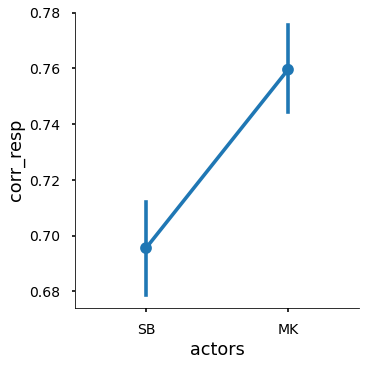

In [114]:
vis.plot_acc(dataframe=df_behav, x='actors', hue= None)
#would be helpful to note this sort of relationship

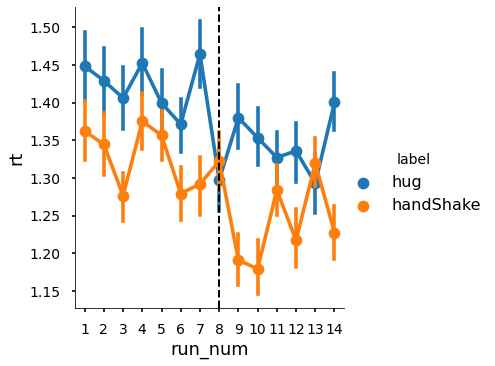

In [105]:
# visualize rt across runs
vis.plot_rt(dataframe=df_behav, x='run_num', hue='label')
#

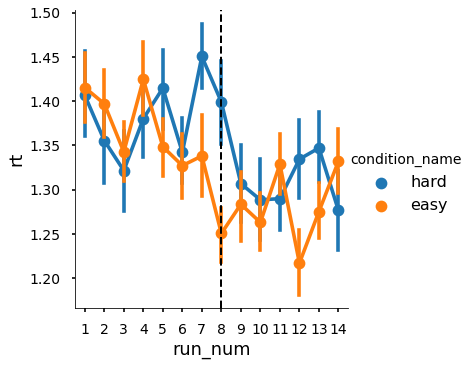

In [107]:
# visualize rt across runs
vis.plot_rt(dataframe=df_behav, x='run_num', hue='condition_name')

In [109]:
#plot diameter
# vis.plot_diameter(dataframe=df_merged)

In [120]:
# plot fixation count vs. condition name
#not able to add "hue" criteria for these visuals
vis.plot_fixation_count(dataframe=df_merged, x='condition_name', hue= "label")

ValueError: Could not interpret input 'label'

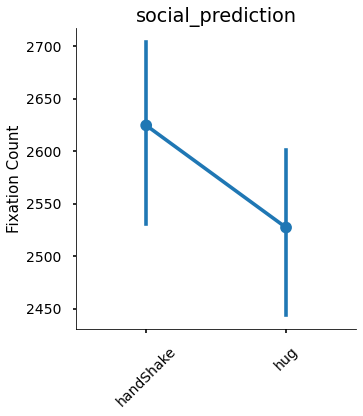

In [110]:
vis.plot_fixation_count(dataframe=df_merged, x='label')

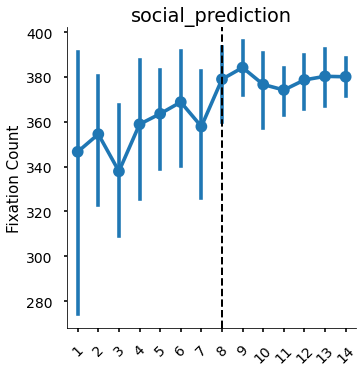

In [78]:
vis.plot_fixation_count(dataframe=df_merged, x='run_num')

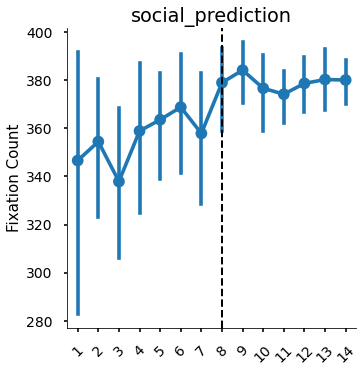

In [94]:
vis.plot_fixation_count(dataframe=df_merged, x='run_num')

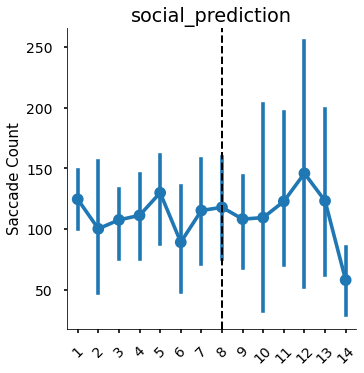

In [81]:
# plot saccade count
vis.plot_saccade_count(dataframe=df_merged, x='run_num')

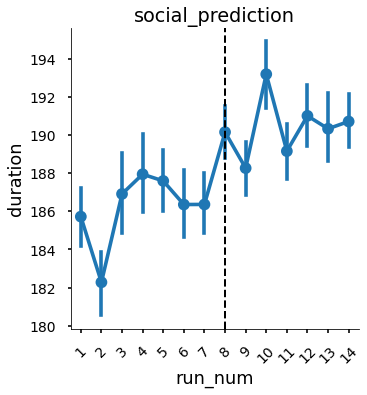

In [88]:
# plot fixation duration
vis.plot_fixation_duration(dataframe=df_merged, x='run_num')

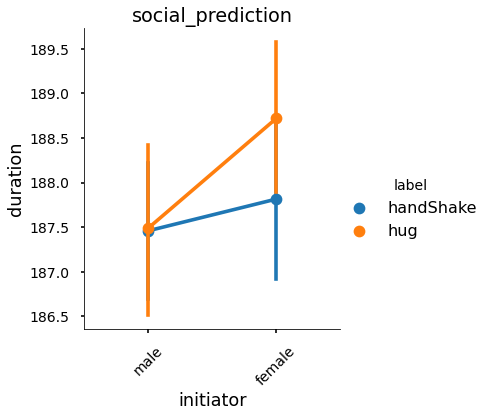

In [119]:
vis.plot_fixation_duration(dataframe=df_merged, x='initiator', hue = 'label')
#interesting, check on duration timescale and significance

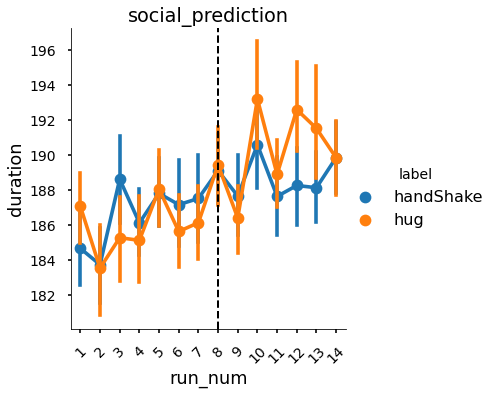

In [96]:
#plot duration vs. duration by label
vis.plot_fixation_duration(dataframe=df_merged, x='run_num', hue = "label")

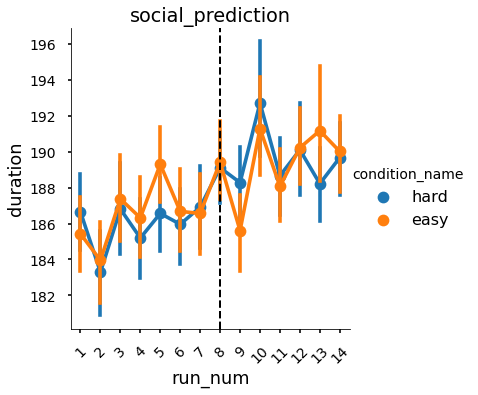

In [97]:
vis.plot_fixation_duration(dataframe=df_merged, x='run_num', hue = "condition_name")

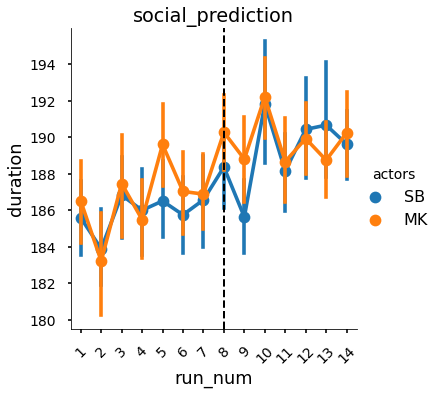

In [90]:
vis.plot_fixation_duration(dataframe=df_merged, x='run_num', hue = "actors")

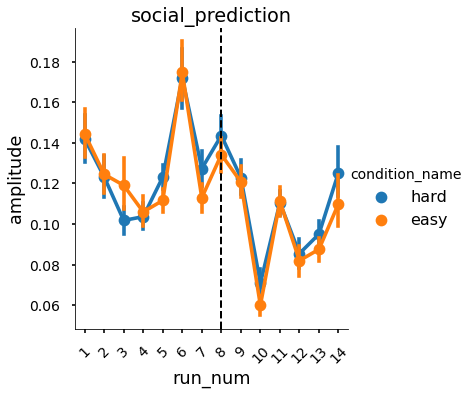

In [86]:
# plot amplitude
vis.plot_amplitude(dataframe=df_merged, x='run_num', hue= 'condition_name')

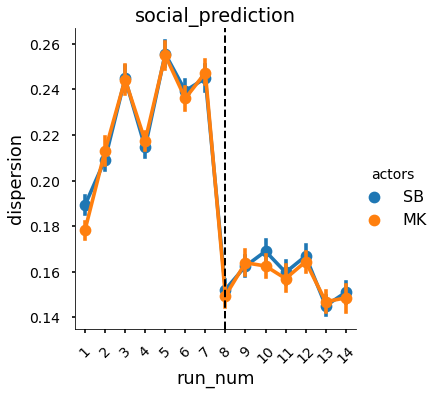

In [20]:
# plot dispersion
#dispersion vs. actors
vis.plot_dispersion(dataframe=df_merged, x='run_num', hue = 'actors')

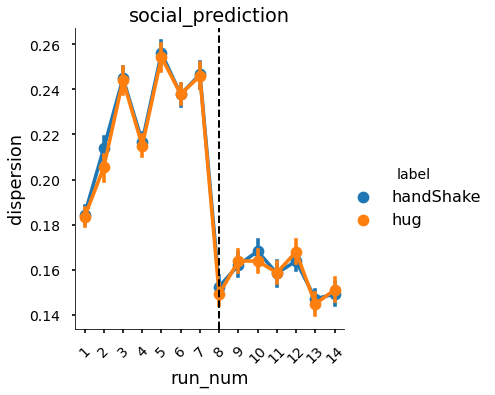

In [98]:
#plot dispersion
#dispersion vs. label
vis.plot_dispersion(dataframe=df_merged, x='run_num', hue = 'label')

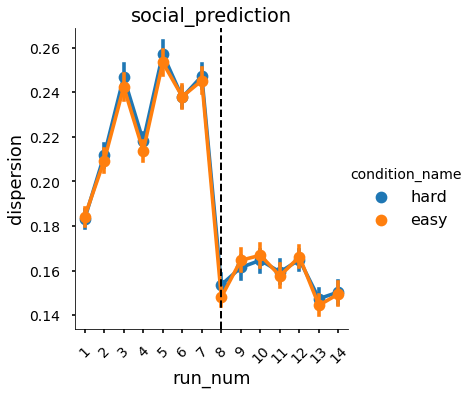

In [95]:
# plot dispersion
#dispersion vs. condition_name
vis.plot_dispersion(dataframe=df_merged, x='run_num', hue = 'condition_name')


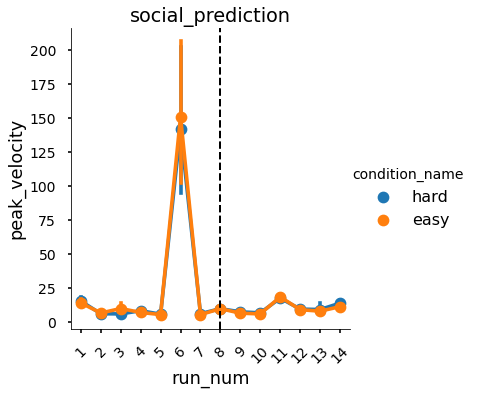

In [100]:
# plot peak velocity
#usual findings based on condition_name
vis.plot_peak_velocity(dataframe=df_merged, x='run_num', hue= 'condition_name')

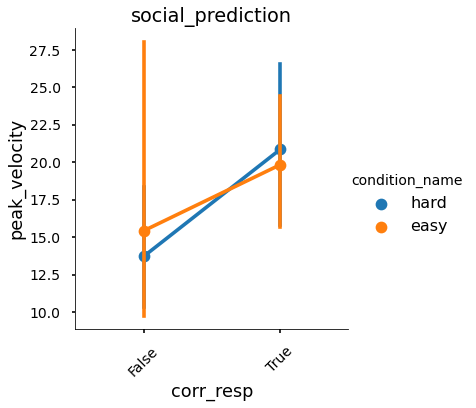

In [103]:
#Relationship between peak_velocity, condition_name, and accuracy

vis.plot_peak_velocity(dataframe=df_merged, x= 'corr_resp', hue= 'condition_name')

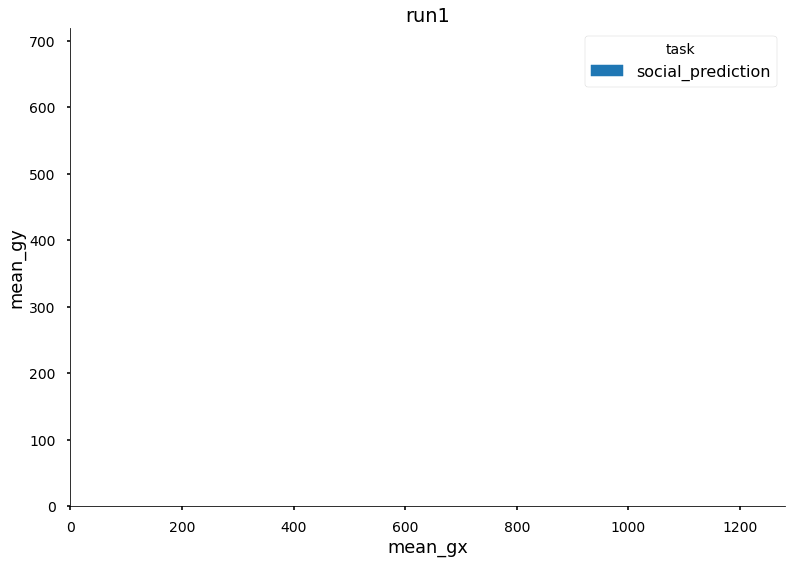

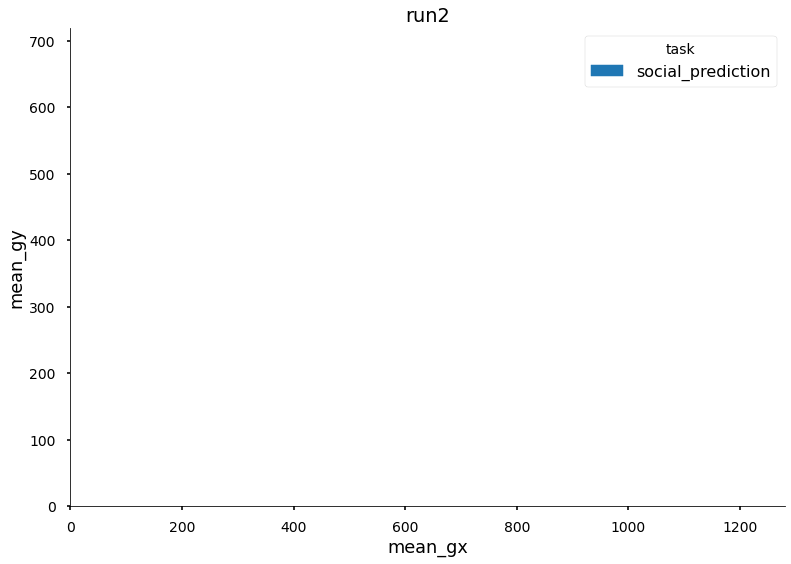

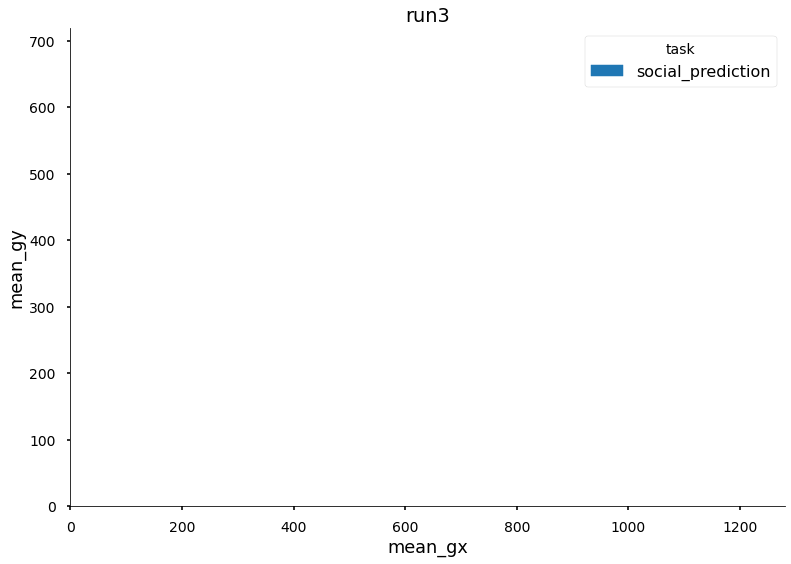

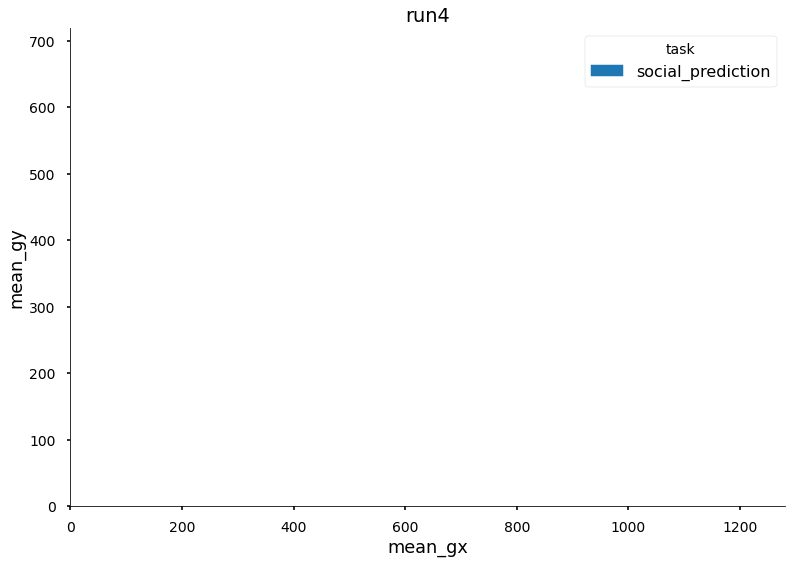

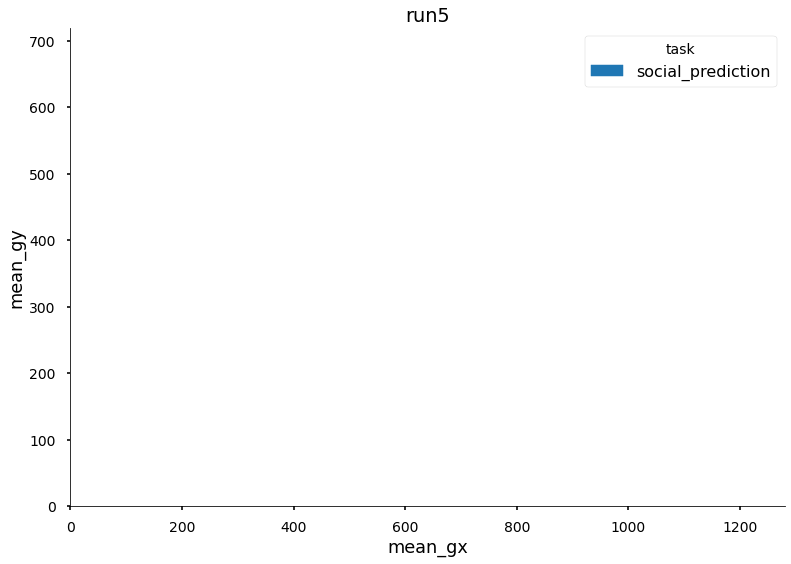

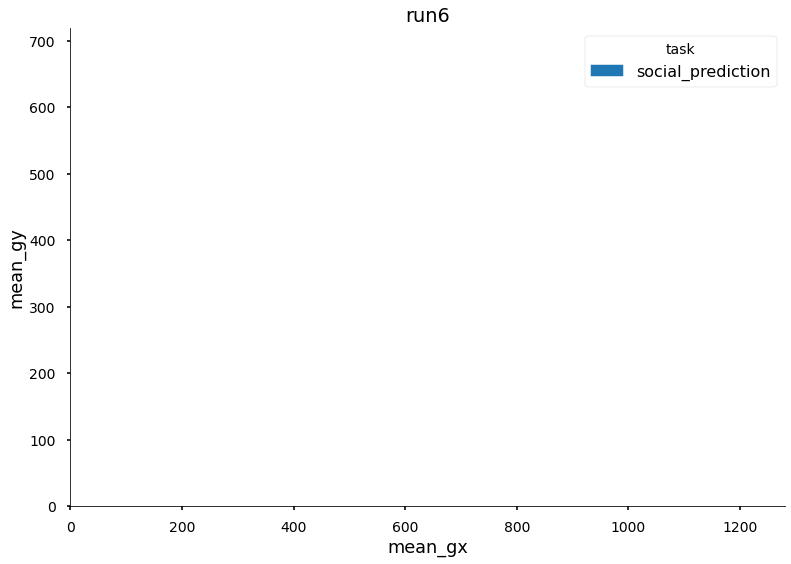

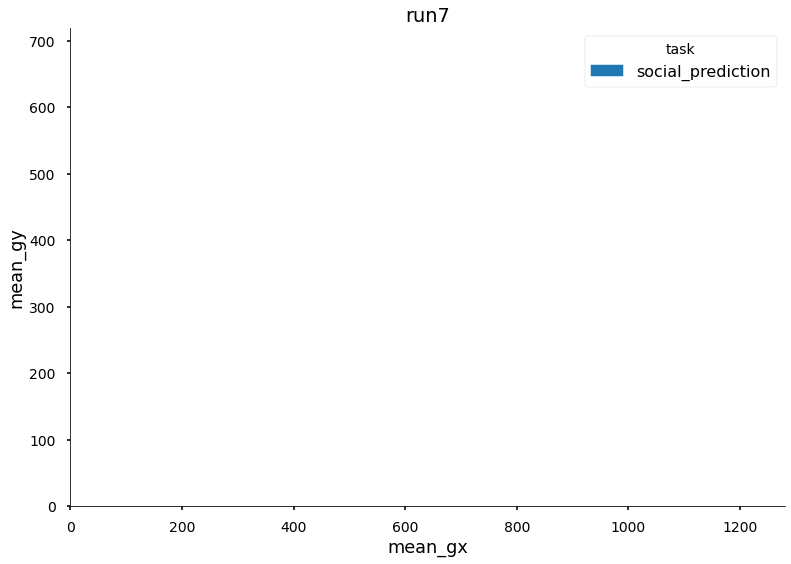

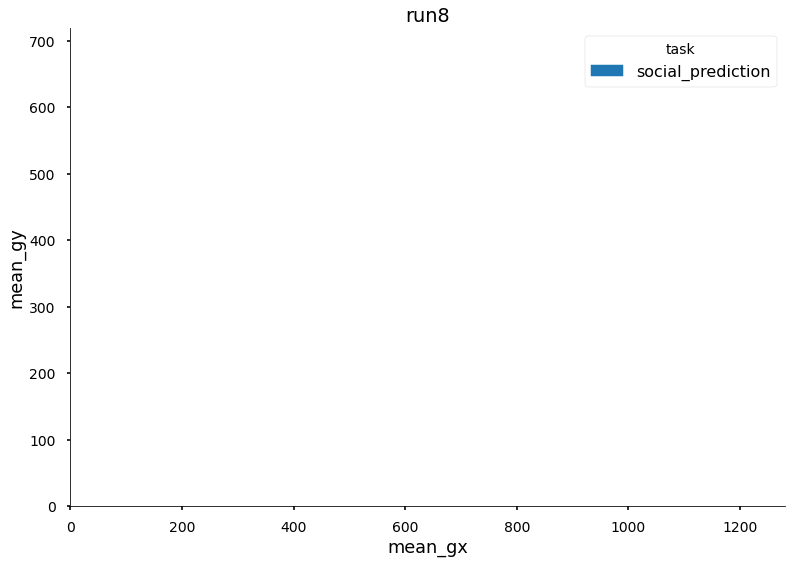

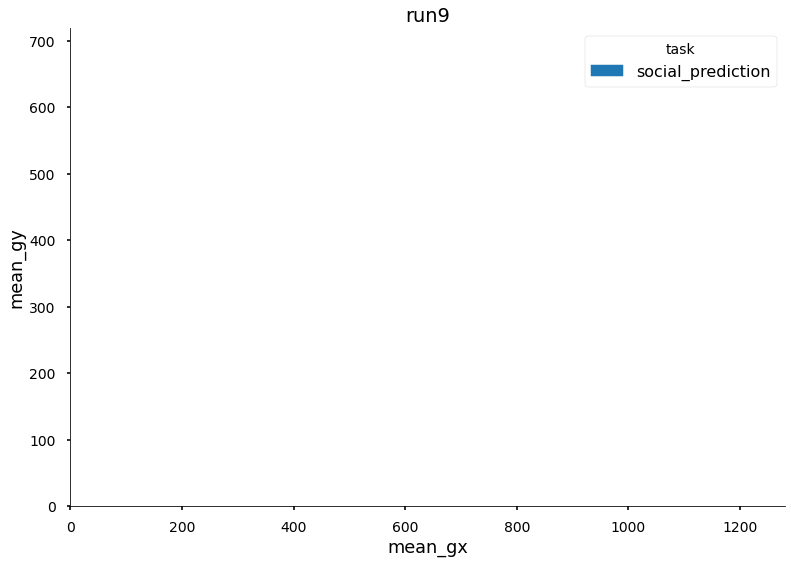

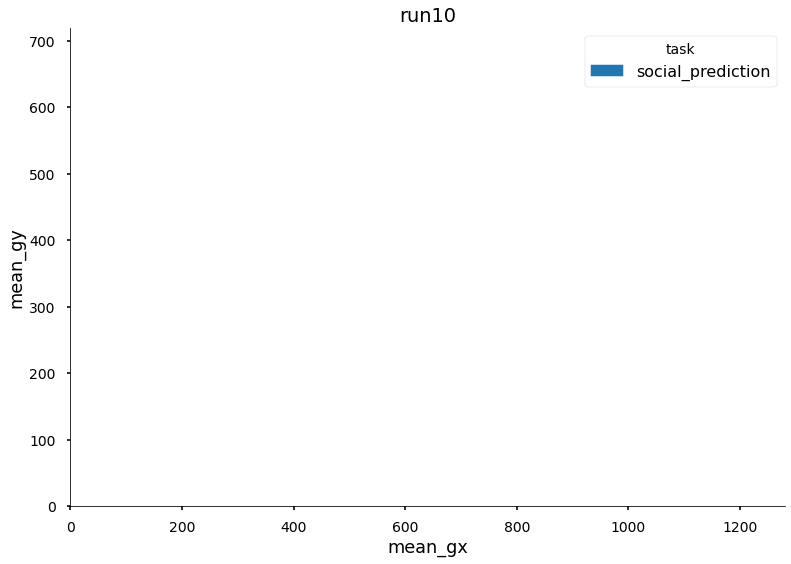

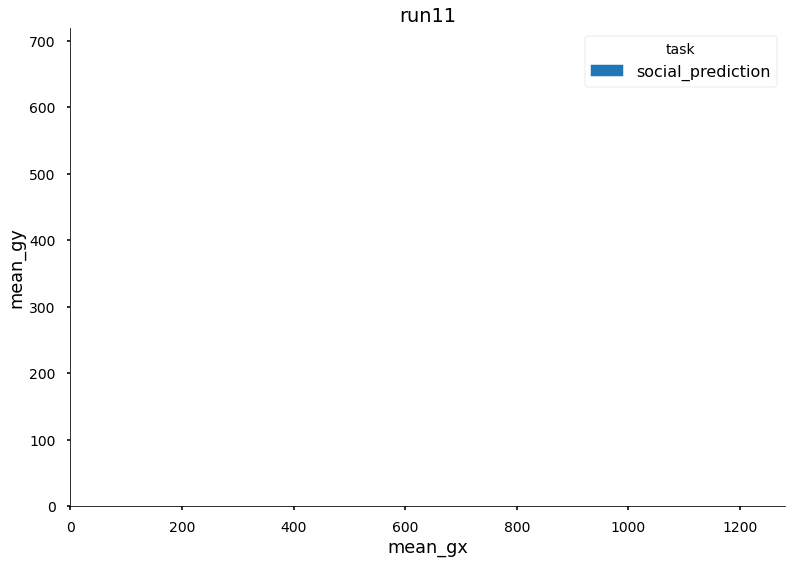

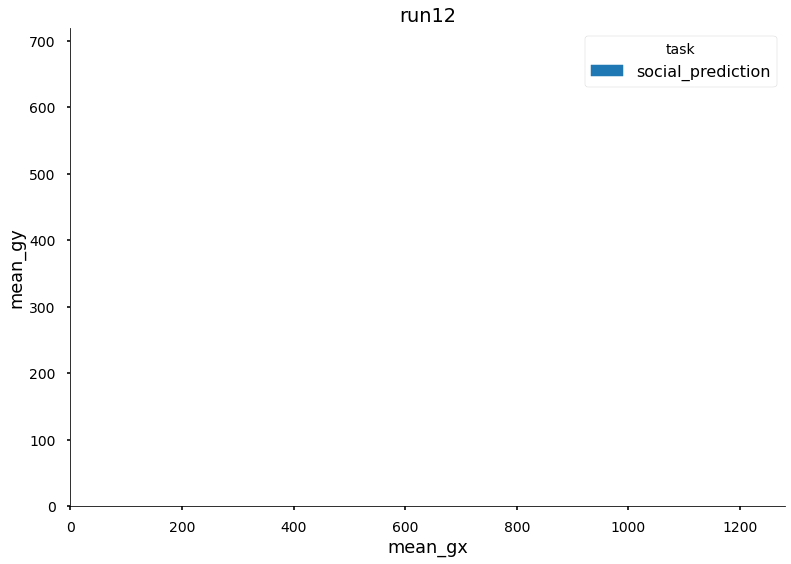

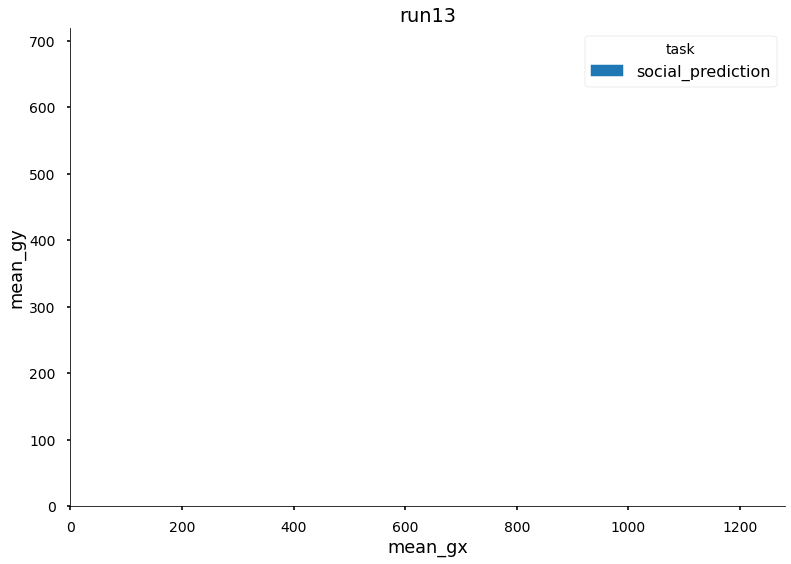

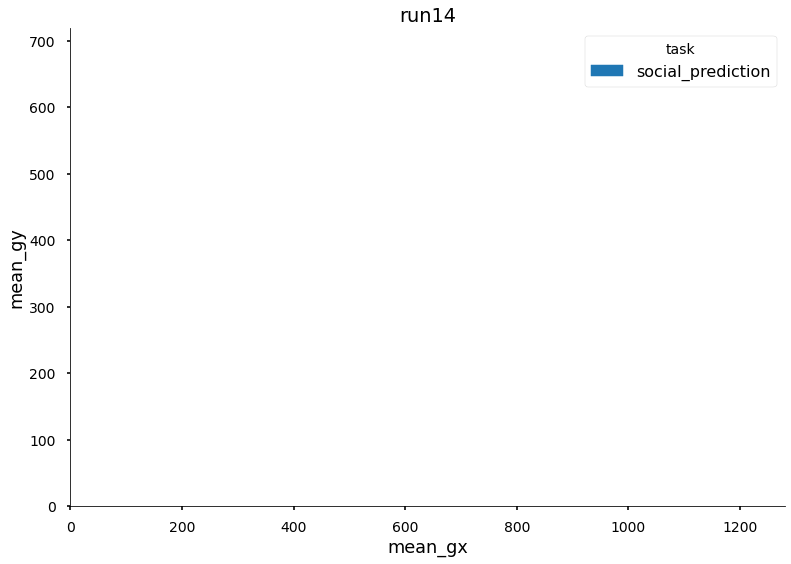

In [63]:
# heatmap

# one subj, one run
for run in range(14):
    tmp = df_eye[(df_eye['subj']=='sIU') & (df_eye['run_num']==run+1) & (df_eye['type']=="fixations")]
    vis.plot_gaze_positions(dataframe=tmp)
    plt.title(f'run{run+1}')

In [64]:
df = df_merged.groupby(['subj', 'sess', 'run_num','type', 'actors', 'label', 'condition_name']
                      ).agg({'rt': 'mean',
                            'corr_resp': 'mean', 
                            'dispersion': 'mean', 
                            'amplitude': 'mean', 
                            'peak_velocity': 'mean', 
                            'duration': 'mean'}).reset_index()

DataError: No numeric types to aggregate

In [16]:
df_merged.columns

Index(['peak_velocity', 'amplitude', 'dispersion', 'start_gx', 'start_gy',
       'end_gx', 'end_gy', 'surface', 'end_time', 'type', 'duration',
       'mean_gx', 'mean_gy', 'block_iter', 'exp_event', 'task', 'event_type',
       'run_num', 'subtract', 'onset_sec', 'subj', 'sess', 'start_time',
       'dataset', 'balance_exp', 'stim', 'condition_name',
       'display_trial_feedback', 'replace_stimuli', 'feedback_type',
       'trial_type', 'hand', 'iti_dur', 'trial_dur', 'corr_key', 'resp_made',
       'corr_resp', 'rt', 'real_start_time', 'run_iter', 'session_type',
       'extracted', 'video_name', 'label', 'context', 'initiator', 'agents',
       'angle', 'interact_start_frames', 'initiator_start_frames', 'actors',
       'video_name_corrected', 'interact_start_frames_corr',
       'interact_start_frames_sec', 'initiator_start_frames_corr',
       'initiator_start_frames_sec', 'media', 'video_start', 'video_end',
       'timestamp_sec', 'block_iter_corr'],
      dtype='object')

In [65]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit()

ModuleNotFoundError: No module named 'sklearn'